In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = (
    SparkSession.builder
    .appName("Ipl-Analysis")
    .master("local[*]")
    .config("spark.ui.port", "4040")
    .getOrCreate()
)


spark

 **1)Ball_By_Ball_Dataframe** 

In [35]:
ball_by_ball_df = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load(r"C:\Users\Shithin\Documents\IPL-Spark\Dataset\data\ball_by_ball.csv")


ball_by_ball_df.show()
      
ball_by_ball_df.printSchema()      



+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out|  lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_s

**2)Match Dataframe**

In [36]:
match_df = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load(r"C:\Users\Shithin\Documents\IPL-Spark\Dataset\data\match.csv")


match_df.show()

match_df.printSchema()      



+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|2008-04-18|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|  BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab|

**Player Dataframe**

In [37]:
player_df = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load(r"C:\Users\Shithin\Documents\IPL-Spark\Dataset\data\player.csv")


player_df.show()


player_df.printSchema()      


+---------+---------+---------------+----------+--------------+--------------------+------------+
|player_sk|player_id|    player_name|       dob|  batting_hand|       bowling_skill|country_name|
+---------+---------+---------------+----------+--------------+--------------------+------------+
|        0|        1|     SC Ganguly|1972-07-08| Left-hand bat|    Right-arm medium|       India|
|        1|        2|    BB McCullum|1981-09-27|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|1974-12-19|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|1977-07-15|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|1980-10-17|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|       R Dravid|1973-01-11|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|       W Jaffer|1978-02-16|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8

**Player_match Dataframe**

In [38]:
player_match_df = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load(r"C:\Users\Shithin\Documents\IPL-Spark\Dataset\data\player_match.csv")

player_match_df.show()

player_match_df.printSchema()      


+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name|       dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+-----------

**Team**

In [39]:
team_df = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load(r"C:\Users\Shithin\Documents\IPL-Spark\Dataset\data\team.csv")


team_df.show()

team_df.printSchema()      


+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
|      2|      3| Chennai Super Kings|
|      3|      4|     Kings XI Punjab|
|      4|      5|    Rajasthan Royals|
|      5|      6|    Delhi Daredevils|
|      6|      7|      Mumbai Indians|
|      7|      8|     Deccan Chargers|
|      8|      9|Kochi Tuskers Kerala|
|      9|     10|       Pune Warriors|
|     10|     11| Sunrisers Hyderabad|
|     11|     12|Rising Pune Super...|
|     12|     13|       Gujarat Lions|
+-------+-------+--------------------+

root
 |-- team_sk: integer (nullable = true)
 |-- team_id: integer (nullable = true)
 |-- team_name: string (nullable = true)



                                                                   ***Transformations***

In [40]:
from pyspark.sql.functions import *
from pyspark.sql.window import *

ball_by_ball_df = ball_by_ball_df.filter(
    (col("wides")== 0) & (col("noballs") == 0)
)

ball_by_ball_df.show(200)



+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out|  lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_s

In [41]:
total_andavg_df = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("Total Runs"),
    avg("runs_scored").alias("Average Runs")
)

total_andavg_df.show(200)


+--------+----------+----------+------------------+
|match_id|innings_no|Total Runs|      Average Runs|
+--------+----------+----------+------------------+
|  980940|         1|       138|              1.15|
|  419132|         1|       162|              1.35|
| 1082632|         2|       202|1.9238095238095239|
|  335993|         2|       131|1.6794871794871795|
|  980910|         2|       156| 1.471698113207547|
|  598057|         2|       141| 1.236842105263158|
|  980966|         1|       143|1.1916666666666667|
|  980982|         2|       169|1.4083333333333334|
|  419114|         2|       130|1.1206896551724137|
|  734042|         2|       146| 1.697674418604651|
|  829772|         2|       111|1.3373493975903614|
|  501257|         2|       143|1.4019607843137254|
|  548328|         2|       123|             1.025|
|  392244|         1|       135|             1.125|
|  336000|         1|       147|             1.225|
|  548340|         1|       122|1.0166666666666666|
|  419149|  

In [42]:
result_df = total_andavg_df.select("*").where(col("match_id") == 980940)

# Show the result
result_df.show(400)

+--------+----------+----------+------------------+
|match_id|innings_no|Total Runs|      Average Runs|
+--------+----------+----------+------------------+
|  980940|         1|       138|              1.15|
|  980940|         2|       141|1.3177570093457944|
+--------+----------+----------+------------------+



In [43]:
window = Window.partitionBy("match_id", "innings_no") \
               .orderBy(col("over_id"))
                        

ball_by_ball_df=ball_by_ball_df.withColumn("Running total Runs",
                                           sum("runs_scored").over(window))

In [44]:
#If any ball where the runs scored + extra runs becomes greater than 6 OR there is a wicket that is credited to the bowler it is high impact ball
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when(
        (col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True),
        True
    ).otherwise(False)
)

ball_by_ball_df.show(300)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+-----------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|         out_type|caught|bowled|run_out|  lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_m

In [45]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)



# Show the enhanced match DataFrame
match_df.show(truncate=False)


     

+--------+--------+---------------------------+---------------------------+----------+-----------+------------------------------------------+----------+------------+---------------------------+---------------------------+---------+--------+------------+-------------+----------+----------+----+-----+---+-------------------+-----------------+
|match_sk|match_id|team1                      |team2                      |match_date|season_year|venue_name                                |city_name |country_name|toss_winner                |match_winner               |toss_name|win_type|outcome_type|manofmach    |win_margin|country_id|year|month|day|win_margin_category|toss_match_winner|
+--------+--------+---------------------------+---------------------------+----------+-----------+------------------------------------------+----------+------------+---------------------------+---------------------------+---------+--------+------------+-------------+----------+----------+----+-----+---+----------

In [46]:

from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left"), "Left-Handed").otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show(2)

+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name|       dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|1972-07-08| Left-hand bat|Right-arm medium|       India|  Left-Handed|
|        1|        2|bb mccullum|1981-09-27|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
only showing top 2 rows



In [47]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# Show the enriched DataFrame
player_match_df.show()


+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name|       dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+-----

**Creating Temp Views for Spark SQL**

In [48]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [49]:
#Top scoring batsmen per season
top_scoring_batsmen_per_season=spark.sql("""
                                        SELECT 
    p.player_name,
    m.season_year,
    SUM(b.runs_scored) AS total_runs 
    FROM ball_by_ball b
    JOIN match m 
    ON b.match_id = m.match_id   
    JOIN player p 
    ON p.player_id = b.striker

    GROUP BY p.player_name, m.season_year

    ORDER BY m.season_year, total_runs DESC

                                         """)

top_scoring_batsmen_per_season.show()

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
| ac gilchrist|       2008|       431|
|    yk pathan|       2008|       430|
|     sk raina|       2008|       420|
|     ms dhoni|       2008|       414|
|    rg sharma|       2008|       399|
|     v sehwag|       2008|       399|
|     r dravid|       2008|       370|
|   sc ganguly|       2008|       349|
|     s dhawan|       2008|       340|
|kc sangakkara|       2008|       319|
|    dj hussey|       2008|       318|
|   rv uthappa|       2008|       316|
|  sa asnodkar|       2008|       311|
| yuvraj singh|       2008|       299|
|     pa patel|       2008|       297|
+-------------+-----------+----------+
only showing top 20 rows



In [50]:
top_scoring_batsmen_per_season.show(7)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
| ac gilchrist|       2008|       431|
|    yk pathan|       2008|       430|
+-------------+-----------+----------+
only showing top 7 rows



In [51]:
#Checking the economy of bowlers in powerplay AND making sure they have bowled atleast 31 balls
economical_bowlers_powerplay = spark.sql("""
SELECT 
    p.player_name,

    AVG(b.runs_scored) AS avg_runs_per_ball,

    SUM(IF(b.bowler_wicket = TRUE, 1, 0)) AS total_wickets

FROM ball_by_ball b 

JOIN player p 
    ON b.bowler = p.player_id

WHERE b.over_id <= 6

GROUP BY p.player_name

HAVING COUNT(*) > 30

ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+-----------------+------------------+-------------+
|      player_name| avg_runs_per_ball|total_wickets|
+-----------------+------------------+-------------+
|       ag murtaza|0.6538461538461539|            2|
|       fh edwards|0.6923076923076923|            3|
|         a kumble|0.7685185185185185|            3|
|         umar gul|0.7777777777777778|            4|
|  smsm senanayake|0.8492063492063492|            4|
|        a symonds|0.8859649122807017|            4|
|       t thushara|               0.9|            3|
|mustafizur rahman|0.9215686274509803|            3|
|        sp narine| 0.929718875502008|           16|
|       gd mcgrath|0.9324324324324325|            8|
|       sl malinga|0.9407630522088354|           35|
|    mohammad nabi|0.9444444444444444|            1|
|    sohail tanvir| 0.946969696969697|            6|
|       a chandila|0.9513888888888888|           10|
|        dp nannes|0.9532163742690059|           15|
|          b kumar|0.9561487130600572|        

In [52]:
#Whther the Toss winner team won the match or not?
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id,m.toss_winner,m.toss_name AS Opting_To,m.match_winner,
    CASE 
        WHEN (m.toss_winner==m.match_winner) THEN 'Won'
        ELSE 'Lost'
        
    END AS Match_Result
    FROM match m
    WHERE m.toss_name IS NOT NULL
    ORDER BY m.match_id
""")

toss_impact_individual_matches.show(20)

+--------+--------------------+---------+--------------------+------------+
|match_id|         toss_winner|Opting_To|        match_winner|Match_Result|
+--------+--------------------+---------+--------------------+------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|        Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|         Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|        Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|        Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|        Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|        Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|        Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|        Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|         Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|        Lost|
|  335997|  

In [53]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name,
AVG(b.runs_scored) AS avg_runs_in_wins,
COUNT(*) AS innings_played
FROM ball_by_ball b 
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id =  p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")

average_runs_in_wins.show(15)

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_played|
+--------------+------------------+--------------+
|   rashid khan|               6.0|             1|
| shahid afridi|3.3333333333333335|             6|
|      an ahmed|               3.0|             3|
|      ba bhatt|               3.0|             2|
|       sn khan|2.5789473684210527|            19|
|    sp jackson|               2.4|             5|
| harmeet singh|2.3333333333333335|             6|
|      umar gul|2.3076923076923075|            13|
|    sm pollock|               2.2|            15|
|       ms gony|2.1379310344827585|            29|
|       pr shah|               2.0|             4|
| shivam sharma|               2.0|             2|
|mj mcclenaghan|               2.0|            11|
|   ds kulkarni|               2.0|             3|
|     vrv singh|               2.0|             2|
+--------------+------------------+--------------+
only showing top 15 rows



In [54]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd
import matplotlib.pyplot as plt


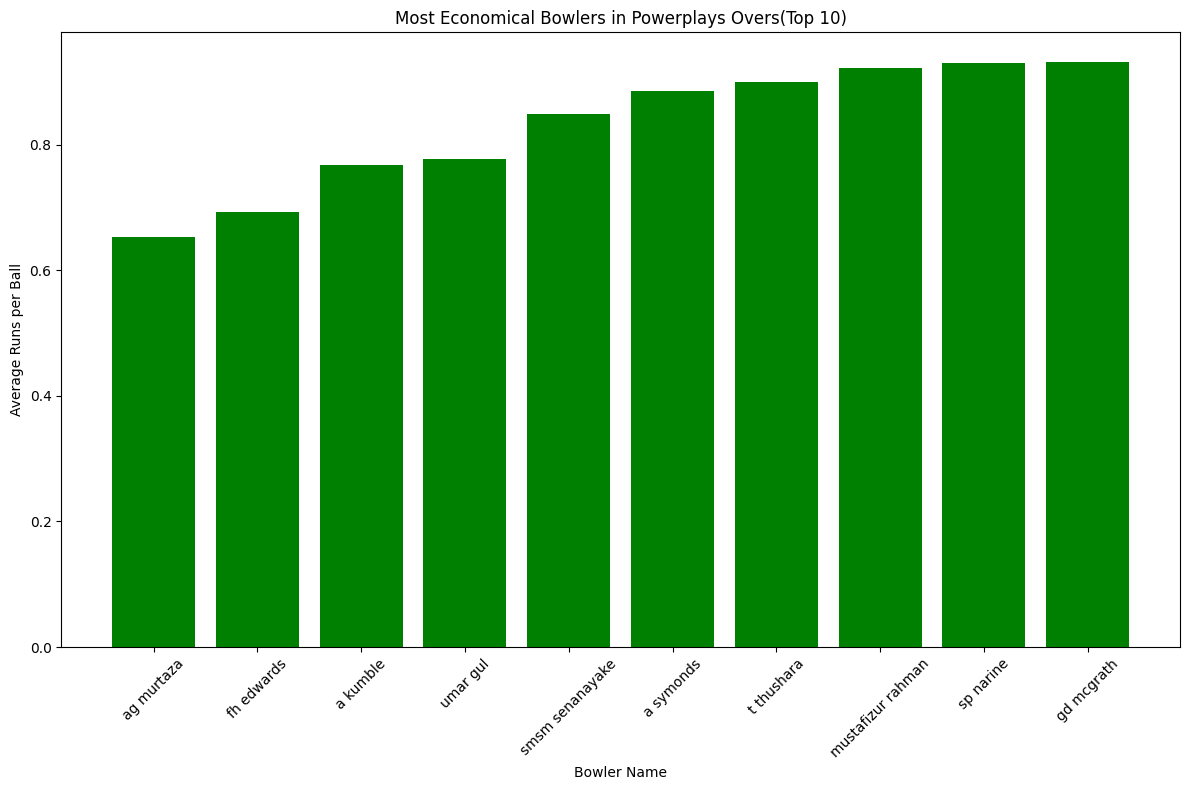

In [56]:
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot 
top_economical_bowlers = economical_bowlers_pd.nsmallest(10,'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color = 'green')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplays Overs(Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
     

In [57]:
import seaborn as sns 

<function matplotlib.pyplot.show(close=None, block=None)>

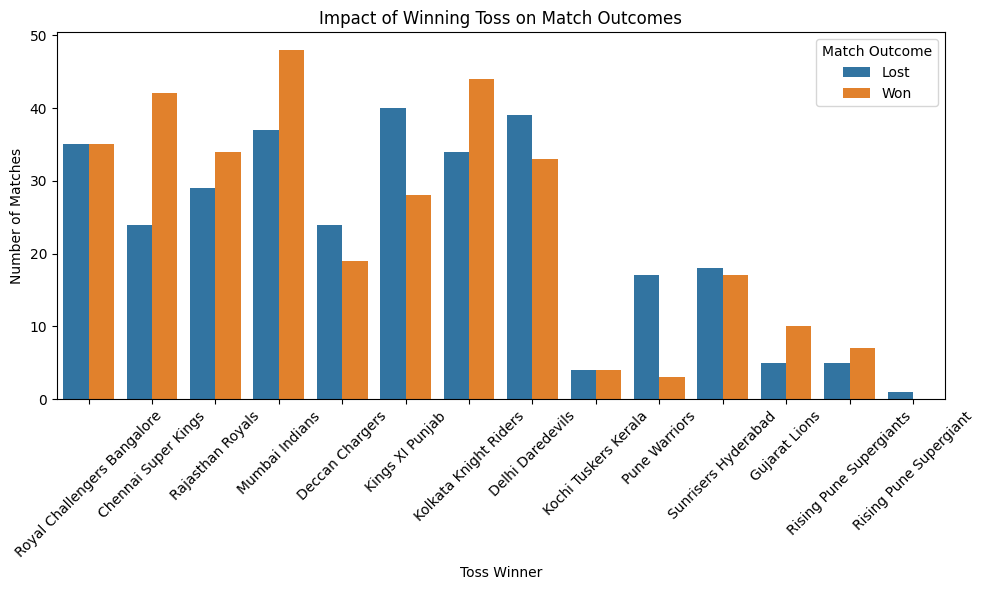

In [58]:

toss_impact_pd = toss_impact_individual_matches.toPandas()
# Creating a countplot to show win/loss after winning toss
plt.figure(figsize = (10,6))
sns.countplot(x='toss_winner', hue='Match_Result',data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

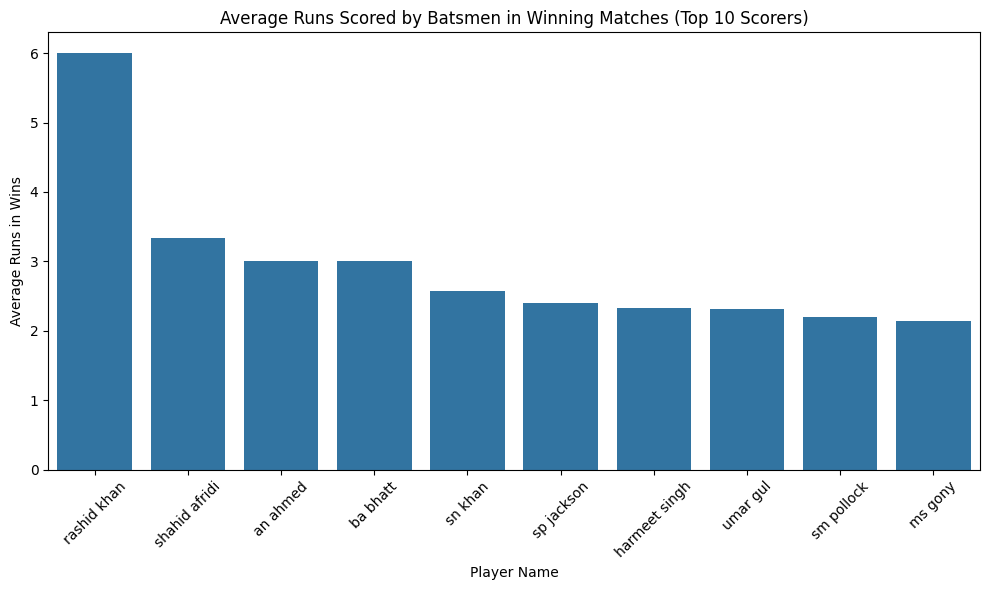

In [59]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches 
plt.figure(figsize=(10,6))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y = 'avg_runs_in_wins',data = top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [60]:
scores_by_venue = spark.sql("""
SELECT venue_name,
AVG(total_runs) AS average_score,
MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

scores_by_venue.show()

+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.1|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.06666666666666|          377|
|Rajiv Gandhi Inte...|             302.0|          365|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
|Punjab Cricket As...|296.77142857142854|          426|
|    Wankhede Stadium| 296.4736842105263|          419|
|Holkar Cricket St...|             296.2|          371|
|Punjab Cricket As...|             296.0|          380|
|M Chinnaswamy Sta...| 292.7878787878788|       

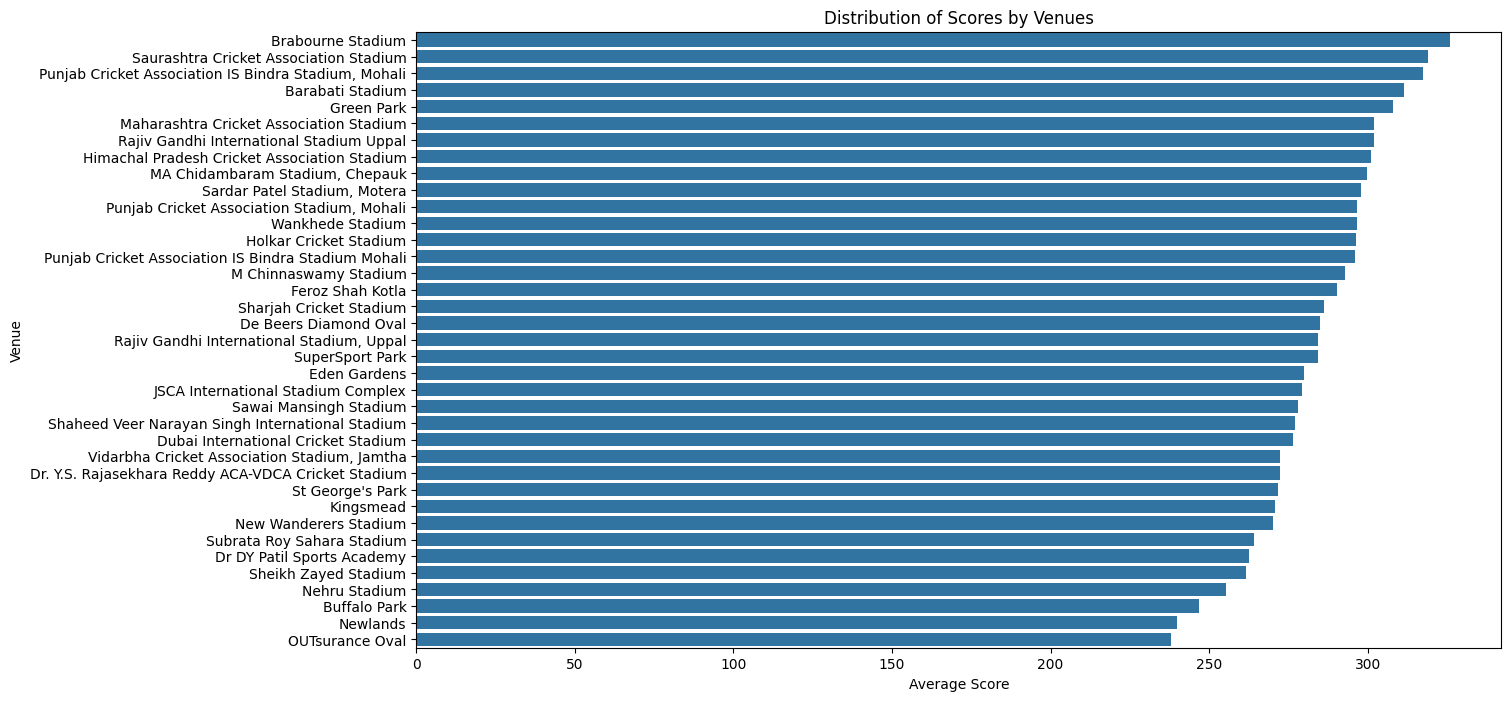

In [61]:

# Convert to pandas dataframe
scores_by_venue_pd = scores_by_venue.toPandas()

# plot
plt.figure(figsize = (14,8))
sns.barplot(x = 'average_score', y = 'venue_name',data = scores_by_venue_pd)
plt.title('Distribution of Scores by Venues')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()


In [62]:
# Dismissal Type 
dismissal_type = spark.sql("""
SELECT out_type,COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL 
GROUP BY out_type
ORDER BY frequency DESC
""")

dismissal_type.show(truncate=False)


+---------------------+---------+
|out_type             |frequency|
+---------------------+---------+
|Not Applicable       |137852   |
|caught               |3678     |
|bowled               |1382     |
|run out              |744      |
|Keeper Catch         |695      |
|lbw                  |455      |
|stumped              |222      |
|caught and bowled    |211      |
|retired hurt         |9        |
|hit wicket           |9        |
|obstructing the field|1        |
+---------------------+---------+



C:\Users\Shithin\AppData\Local\Temp\ipykernel_17240\3536341898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency',y='out_type', data = dismissal_type_pd, palette ='pastel')


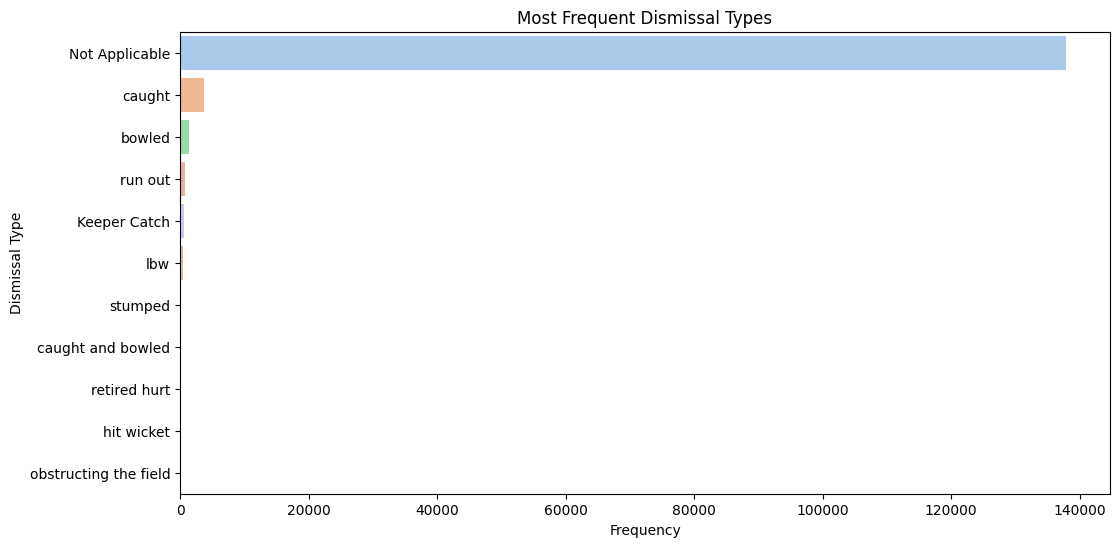

In [63]:

# Plot
dismissal_type_pd = dismissal_type.toPandas()

plt.figure(figsize=(12,6))
sns.barplot(x='frequency',y='out_type', data = dismissal_type_pd, palette ='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [64]:

# Team toss winning performance
team_toss_win_performance = spark.sql("""
SELECT team1,COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1 
GROUP BY team1 
ORDER BY wins_after_toss DESC
""")

C:\Users\Shithin\AppData\Local\Temp\ipykernel_17240\824312813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wins_after_toss',y='team1',data=team_toss_win_performance_pd, palette ='pastel')


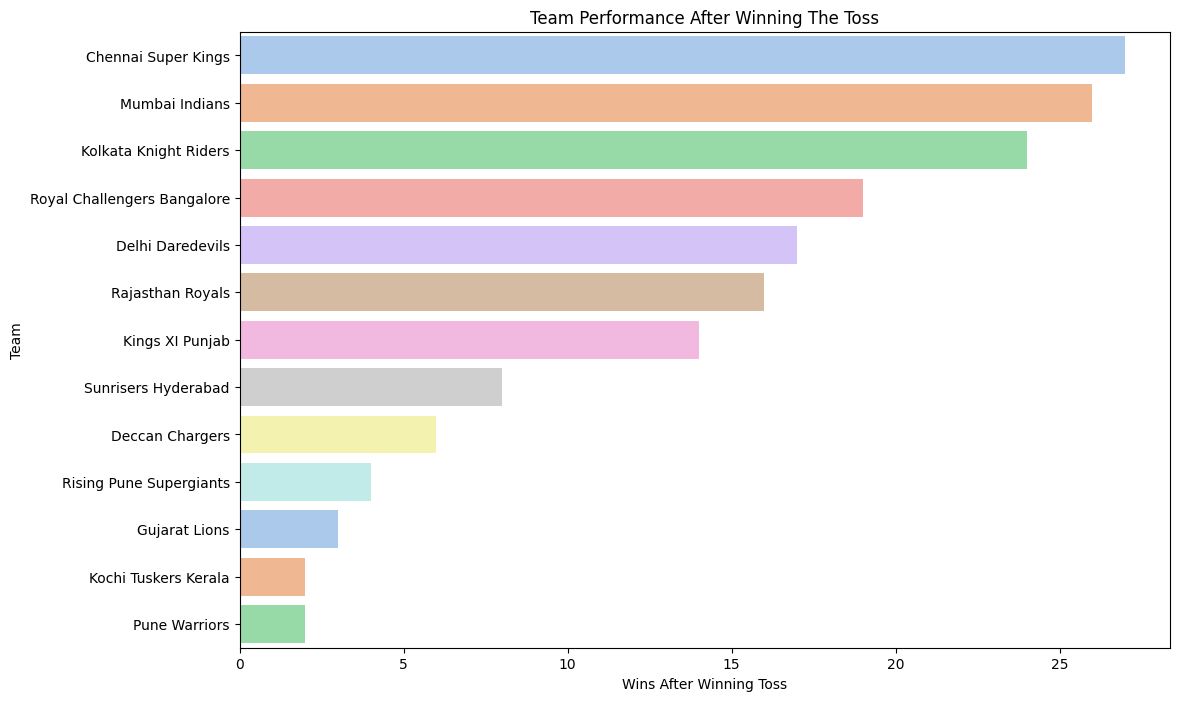

In [65]:

# plot 
team_toss_win_performance_pd = team_toss_win_performance.toPandas()
plt.figure(figsize=(12,8))
sns.barplot(x='wins_after_toss',y='team1',data=team_toss_win_performance_pd, palette ='pastel')
plt.title('Team Performance After Winning The Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()